**Student Information**

Môn học: Toán Ứng dụng và Thống kê

Họ tên: Bế Lã Anh Thư

Lớp: 22CLC02

MSSV: 22127402


# **Khai thác tập data**


In [1]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv', sep=',')
df.drop("SEQN", axis=1, inplace=True)
df.drop("age_group", axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIDAGEYR  2278 non-null   float64
 1   RIAGENDR  2278 non-null   float64
 2   PAQ605    2278 non-null   float64
 3   BMXBMI    2278 non-null   float64
 4   LBXGLU    2278 non-null   float64
 5   DIQ010    2278 non-null   float64
 6   LBXGLT    2278 non-null   float64
 7   LBXIN     2278 non-null   float64
dtypes: float64(8)
memory usage: 142.5 KB


In [3]:
df.describe()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


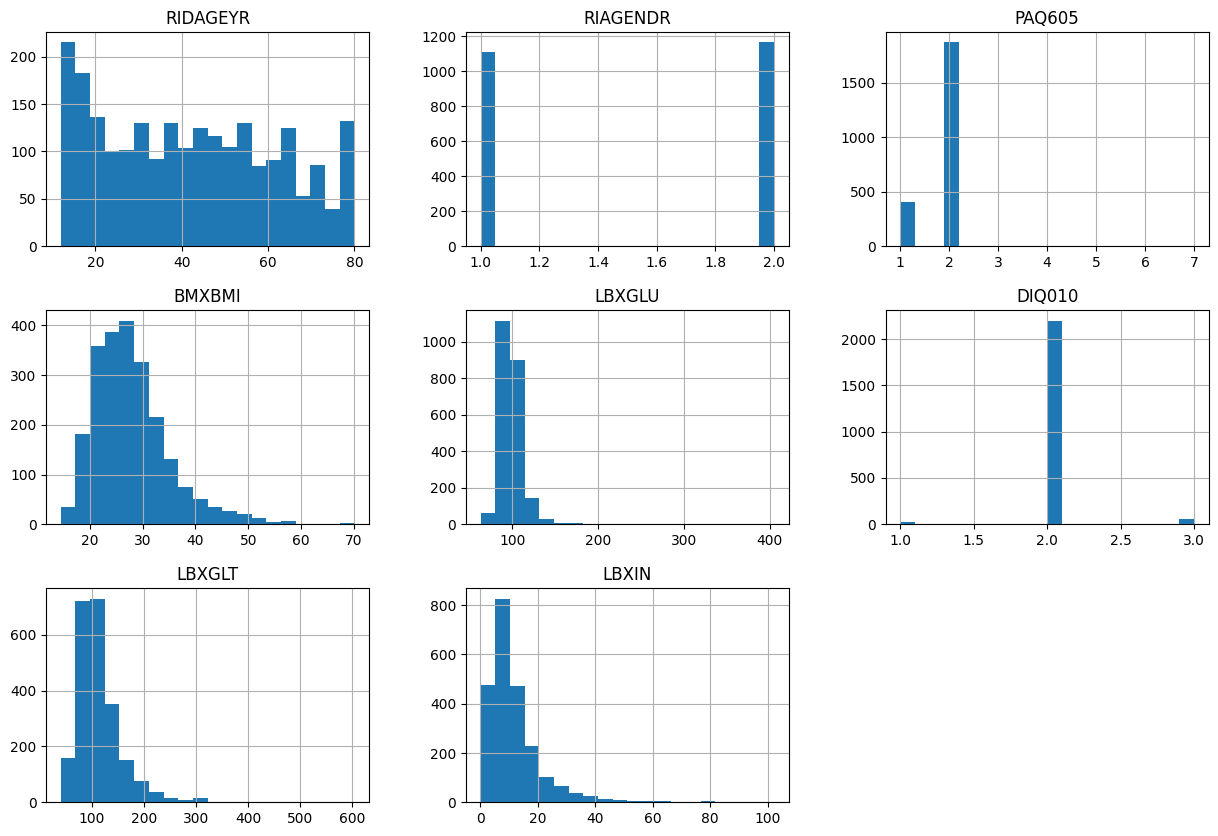

In [4]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

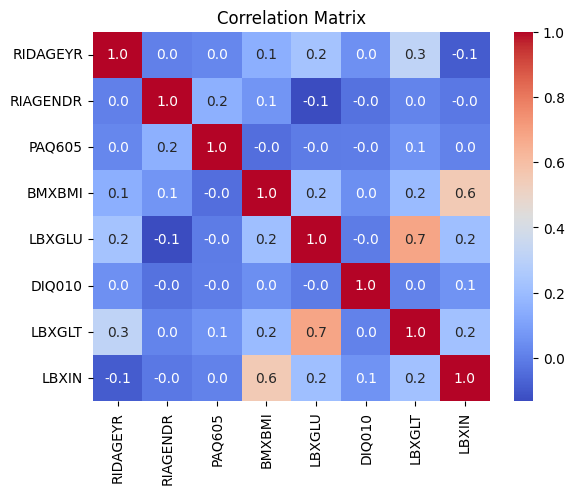

In [5]:
# Phân tích tương quan giữa các đặc trưng và biến mục tiêu 'quality'
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt= '.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Xem hệ số tương quan của từng đặc trưng với 'DIQ010'
print(correlation_matrix['DIQ010'].sort_values(ascending=False))

DIQ010      1.000000
LBXIN       0.058986
RIDAGEYR    0.049970
BMXBMI      0.047133
LBXGLT      0.009796
PAQ605     -0.002599
LBXGLU     -0.004427
RIAGENDR   -0.032769
Name: DIQ010, dtype: float64


Kết luận: Đặc trưng LBXIN có độ tương quan với biến mục tiêu (DIQ010) cao nhất.

# Các hàm bổ sung

In [7]:
def dot_product(v1, v2):
    '''
        calculate the dot product of 2 vector
        return (int)
    '''
    return sum(x*y for x, y in zip(v1, v2))

def swap_row(A, pre_index, new_index):
    ''' 
        swap 2 row of the matrix
    '''
    A[pre_index], A[new_index] = A[new_index], A[pre_index]

def subtract_vectors(a, b):
    ''' 
        subtract vector b from vector a
        size: nx1
        return vector size nx1
    '''
    return [[a[i][0] - b[i][0]] for i in range(len(a))]

def determinant(matrix):
    '''
        Tính định thức ma trận
        Input: matrix (list of lists), ma trận vuông size nxn
        Output: determinant value (float or int)
    '''
    # Base case for 2x2 matrix
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    det = 0
    for c in range(len(matrix)):
        submatrix = [[matrix[r][i] for i in range(len(matrix)) if i != c] for r in range(1, len(matrix))]
        sign = (-1) ** c  # Alternate signs for cofactor expansion
        sub_det = determinant(submatrix)
        det += (sign * matrix[0][c] * sub_det)
    
    return det

def norm_product(vec):
    '''   
        Tính chuẩn của các vector
    '''
    return dot_product([v[0] for v in vec], [v[0] for v in vec]) ** 0.5

def create_identity_matrix(n):
    ''' 
        tạo ma trận đơn vị size nxn
    '''
    return [[1 if row == col else 0 for col in range(n)] for row in range(n)]

def lu_decomposition(A):
    ''' 
        Chéo hóa ma trận A, sử dụng LU decomposition; A = L.U
        input: ma trận A
        return:
            L: ma trận bậc thang dưới (nxn)
            U ma trận bậc thang trên (nxn)
    '''
    n = len(A)
    L = create_identity_matrix(n)
    U = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            # Calculate U
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        
        for j in range(i + 1, n):
            # Calculate L
            if U[i][i] == 0:
                raise ValueError("Matrix is singular and cannot be inverted.")
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]

    return L, U

def forward_substitution(L, B):
    ''' 
        forward subtitution để giải LY = B.
        L: Lower triangular matrix. (nxn)
        B: Right-hand side matrix. (nx1)
    '''
    n = len(L)
    Y = [[0] * len(B[0]) for _ in range(n)]

    for i in range(n):
        for j in range(len(B[0])):
            Y[i][j] = (B[i][j] - sum(L[i][k] * Y[k][j] for k in range(i))) / L[i][i]
    
    return Y

def backward_substitution(U, Y):
    ''' 
        backward subtitution để giải UX = Y.
        U: Upper triangular matrix.
        Y: Right-hand side matrix.
    '''
    n = len(U)
    X = [[0] * len(Y[0]) for _ in range(n)]

    for i in range(n - 1, -1, -1):
        for j in range(len(Y[0])):
            X[i][j] = (Y[i][j] - sum(U[i][k] * X[k][j] for k in range(i + 1, n))) / U[i][i]

    return X

def inversion_lu(A):
    '''
        tạo ma trận nghịch đảo của ma trận A sử dụng LU decomposition.
        A.X = Y
        ta có:
            A = L.U
            L.Y = B
            U.X = Y
    '''
    n = len(A)
    I = create_identity_matrix(n)
    L, U = lu_decomposition(A)
    
    # Solve for each column of the inverse
    inv_A = []
    for col in range(n):
        B = [[I[row][col]] for row in range(n)] # B: matrix of each column of the inversion matrix
        Y = forward_substitution(L, B) # forward subtitution to get matrix Y
        X = backward_substitution(U, Y) # backward subtitution to get result of that column
        inv_A.append([x[0] for x in X])
    
    # Transpose to get the inverse matrix in correct orientation
    return tranpose(inv_A)

def tranpose(A):
    '''
        create the tranpose matrix of matrix A
    '''
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def multiply_matrix_matrix(A, B):
    ''' 
        multiply 2 matrix.
        A: matrix size nxm
        B: matrix size mxp
        return: matrix size nxp
    '''
    # Kiểm tra xem số cột của A có bằng số hàng của B không
    if len(A[0]) != len(B):
        raise ValueError("Số cột của A phải bằng số hàng của B để nhân ma trận.")
    
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

def calculate_rss(Y, X, theta):
    '''      
        calculate the RSS.
        Y: vector size nx1
        X: matrix size nxm
        theta: vector size mx1
    '''
    # calculate X.theta
    X_theta = multiply_matrix_matrix(X, theta)

    # calculate Y - X.theta
    residuals = subtract_vectors(Y, X_theta)

    rss = norm_product(residuals) ** 2

    return rss

# **a) Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp**

Mô hình tuyến tính $Y =  \theta_0 + \displaystyle\sum_{i=1}^N\theta_i X_i$

In [8]:
def model_equationa(theta, feature_names):
    equation = f"y = {theta[0][0]:.4f}"
    for i in range(1, len(theta)):
        equation += f" + {theta[i][0]:.4f} * {feature_names[i-1]}"
    return equation

feature_names = df.columns.drop("DIQ010").tolist()

# tạo ma trận X và ma trận Y từ dataframe
X = df.drop("DIQ010", axis=1).values.tolist() # features
Y = df["DIQ010"].values.tolist() # target

# thêm X^0 vào X (giá trị 1)
X = [[1] + row for row in X]
Y = [[y] for y in Y]

# Tìm ma trận X^T.X
X_T = tranpose(X)
XTX = multiply_matrix_matrix(X_T, X)

# nghịch đảo ma trận X^T.X
XTX_inv = inversion_lu(XTX)

# ma trận X^T.Y
XTY = multiply_matrix_matrix(X_T, Y)

# argmin(RSS)
theta = multiply_matrix_matrix(XTX_inv, XTY)

# tính chuẩn bình phương tối thiểu
rss = calculate_rss(Y, X, theta)

# xuất ra kết quả
print(f'Theta: {theta}')

# In ra phương trình hồi quy
equation = model_equationa(theta, feature_names)
print(f'Model: {equation}')

print(f'Sai số bình phương tối thiểu (RSS) = {rss}')

Theta: [[2.031667073938814], [0.000582799521943976], [-0.014351965399914679], [0.0004527383849864397], [0.0003149172663327593], [-0.0004399321348278187], [1.0603782563942121e-05], [0.0012553690581365018]]
Model: y = 2.0317 + 0.0006 * RIDAGEYR + -0.0144 * RIAGENDR + 0.0005 * PAQ605 + 0.0003 * BMXBMI + -0.0004 * LBXGLU + 0.0000 * LBXGLT + 0.0013 * LBXIN
Sai số bình phương tối thiểu (RSS) = 77.68555702502054


# **b) Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.**

Mô hình tuyến tính $Y =  \theta_0 + \theta_1 X$

Feature: RIDAGEYR
Theta: [[1.9970153755908537], [0.00046002010696286066]]
Model: y = 1.9970 + 0.0005 * RIDAGEYR
Sai số bình phương tối thiểu (RSS) = 78.20327145220776



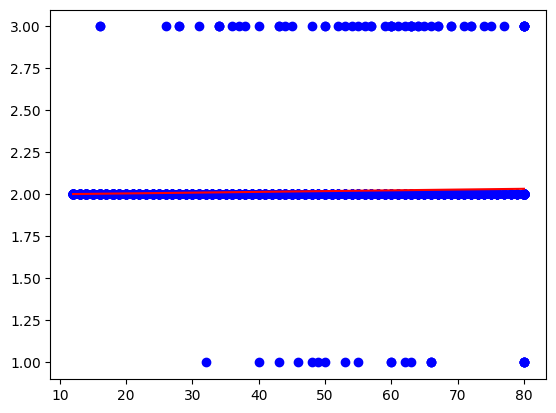

Feature: RIAGENDR
Theta: [[2.0346232006447416], [-0.01216138573009573]]
Model: y = 2.0346 + -0.0122 * RIAGENDR
Sai số bình phương tối thiểu (RSS) = 78.31484947691929



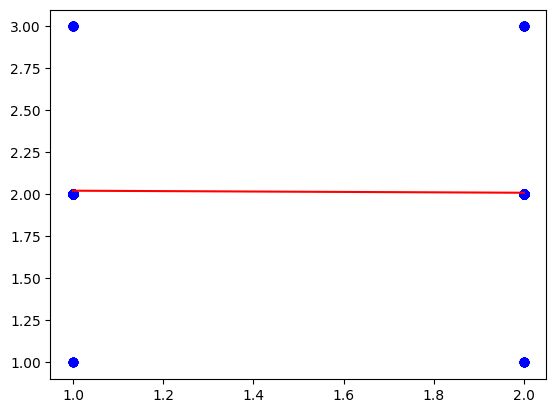

Feature: PAQ605
Theta: [[2.01844600913941], [-0.0012090580008567997]]
Model: y = 2.0184 + -0.0012 * PAQ605
Sai số bình phương tối thiểu (RSS) = 78.39850454789952



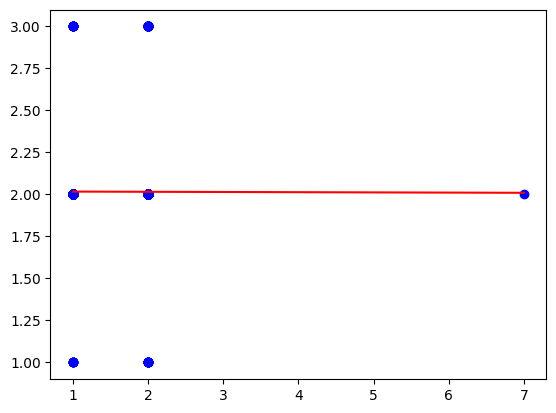

Feature: BMXBMI
Theta: [[1.9825143998260089], [0.0012064997620415685]]
Model: y = 1.9825 + 0.0012 * BMXBMI
Sai số bình phương tối thiểu (RSS) = 78.22486593691944



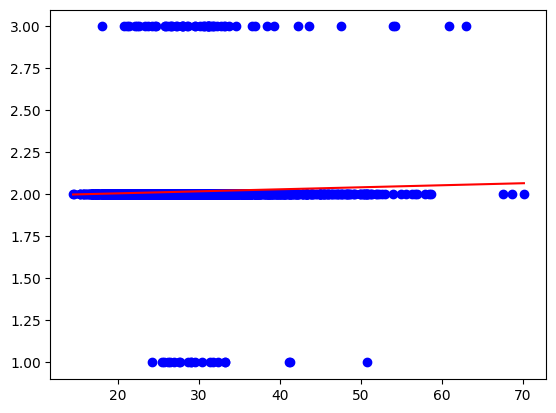

Feature: LBXGLU
Theta: [[2.0208139809173957], [-4.592184798546395e-05]]
Model: y = 2.0208 + -0.0000 * LBXGLU
Sai số bình phương tối thiểu (RSS) = 78.3974974512031



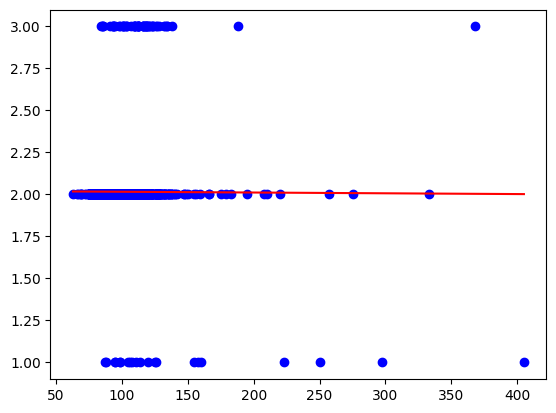

Feature: LBXGLT
Theta: [[2.01180140696545], [3.862369305633606e-05]]
Model: y = 2.0118 + 0.0000 * LBXGLT
Sai số bình phương tối thiểu (RSS) = 78.39151113187064



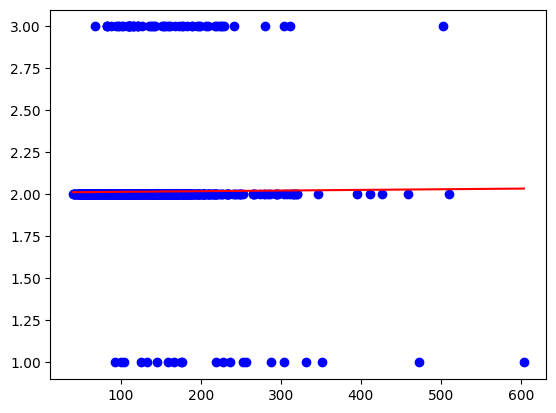

Feature: LBXIN
Theta: [[2.0029142214117006], [0.00112617902540868]]
Model: y = 2.0029 + 0.0011 * LBXIN
Sai số bình phương tối thiểu (RSS) = 78.12625945258675



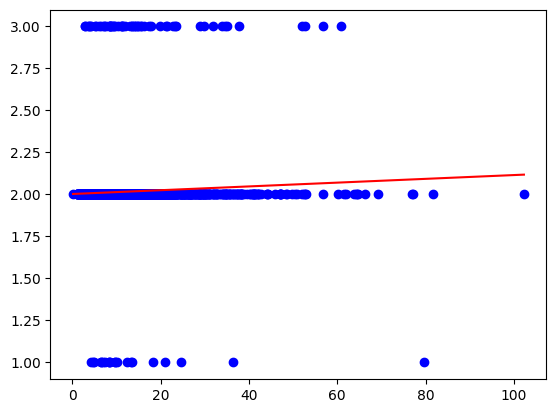

Đặc trưng cho kết quả tốt nhất: LBXIN
RSS: 78.12625945258675


In [9]:
def linspace(start, stop, num=50):
    '''
    Generate num evenly spaced samples, calculated over the interval [start, stop].
    '''
    if num <= 0:
        return []
    elif num == 1:
        return [start]

    step = (stop - start) / (num - 1)
    return [start + step * i for i in range(num)]

def model(x, theta):
    return theta[0][0] + theta[1][0] * x

def draw_plot(X, Y, theta):
    '''   
        trực quan hóa dữ liệu bằng hàm plot
    '''
    X_values = [x[0] for x in X]

    ts = linspace(min(X_values), max(X_values), 50)
    yts = [model(t, theta) for t in ts]
    # tạo plot
    plt.plot(X_values, [y[0] for y in Y], "o", color="blue")
    plt.plot(ts, yts, color="red")
    plt.show()

# tạo ma trận X và ma trận Y từ dataframe
X = df.drop("DIQ010", axis=1).values.tolist() # features
Y = df["DIQ010"].values.tolist() # target
features = df.drop("DIQ010", axis=1).columns.tolist()
min_rss = float('inf')
min_feature = None

for i in range(len(features)):
    X_i_or = [[row[i]] for row in X]

    # thêm theta_0 vào X (giá trị 1)
    X_i = [[1] + row for row in X_i_or]
    Y_i = [[y] for y in Y]

    # Tìm ma trận X^T.X
    X_T = tranpose(X_i)
    XTX = multiply_matrix_matrix(X_T, X_i)

    # nghịch đảo ma trận X^T.X
    XTX_inv = inversion_lu(XTX)

    # ma trận X^T.Y
    XTY = multiply_matrix_matrix(X_T, Y_i)

    # argmin(RSS)
    theta = multiply_matrix_matrix(XTX_inv, XTY)

    # tính chuẩn bình phương tối thiểu
    rss = calculate_rss(Y_i, X_i, theta)
    if rss <= min_rss:
        min_rss = rss
        min_feature = features[i]

    print(f'Feature: {features[i]}')
    print(f'Theta: {theta}')

    equation = f"y = {theta[0][0]:.4f} + {theta[1][0]:.4f} * {features[i]}"
    print(f'Model: {equation}')

    print(f'Sai số bình phương tối thiểu (RSS) = {rss}\n')
    draw_plot(X_i_or, Y_i, theta)

print(f'Đặc trưng cho kết quả tốt nhất: {min_feature}')
print(f'RSS: {min_rss}')

# c) **Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.**
Mô hình hồi quy với tương tác $y = \theta_0 + \displaystyle\sum_{i=1}^N\theta_iX_i + \displaystyle\sum_{1 \leq i < j \leq N}\theta_{ij}(X_i \times X_j)$.

In [10]:
def model_equationc(theta, feature_names):
    equation = f"y = {theta[0][0]:.10f}"
    
    index = 1
    for i in range(len(feature_names)):
        equation += f" + {theta[index][0]:.10f} * {feature_names[i]}"
        index += 1
    
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            equation += f" + {theta[index][0]:.10f} * ({feature_names[i]} * {feature_names[j]})"
            index += 1
    
    return equation

# Tạo ma trận X và ma trận Y từ dataframe
X = df.drop("DIQ010", axis=1).values.tolist()  # Features
Y = df["DIQ010"].values.tolist()  # Target

# Tạo các biến tương tác
interaction_X = []
num_features = len(X[0])
for row in X:
    interaction_row = row[:]
    for i in range(num_features):
        for j in range(i + 1, num_features):
            interaction_row.append(row[i] * row[j])
    interaction_X.append(interaction_row)

# Thêm X^0 vào X (giá trị 1 cho hệ số chặn)
interaction_X = [[1] + row for row in interaction_X]
Y = [[y] for y in Y]

# Tìm ma trận X^T.X
X_T = tranpose(interaction_X)
XTX = multiply_matrix_matrix(X_T, interaction_X)

# Nghịch đảo ma trận X^T.X
XTX_inv = inversion_lu(XTX)

# Ma trận X^T.Y
XTY = multiply_matrix_matrix(X_T, Y)

# Tìm hệ số theta bằng công thức: theta = (X^T * X)^(-1) * X^T * Y
theta = multiply_matrix_matrix(XTX_inv, XTY)

# Tính Sai số bình phương tối thiểu (RSS)
rss = calculate_rss(Y, interaction_X, theta)

# Xuất ra kết quả
print("Mô hình hồi quy với tương tác:")
print(f"Hệ số (theta): {theta}")

equation = model_equationc(theta, feature_names)
print(f'Model: {equation}')

print(f"Sai số bình phương tối thiểu (RSS) = {rss}")


Mô hình hồi quy với tương tác:
Hệ số (theta): [[1.9162702231253022], [0.005048954750344739], [0.09117522642590714], [-0.08801067505049875], [-0.0034725436483418193], [4.931383008965895e-05], [0.0003796931685606242], [-0.0034950413205310227], [-0.00033658442568319444], [-0.0001167292681261839], [-7.750858739049779e-05], [-3.2345966403282515e-05], [4.916074274014231e-06], [6.153357692649519e-05], [0.02220888482901784], [0.0014400048063387821], [-0.0006874119060179262], [-0.0007417511766375645], [-0.0011383980546642025], [-0.0026289447281455935], [0.00037181130641730786], [0.0007889797674555908], [0.001599962237086118], [0.00010690753978290224], [-7.324555211164763e-06], [-4.2864295830976566e-05], [-7.0407247161136046e-06], [1.894787473152859e-05], [1.5183131154977714e-06]]
Model: y = 1.9162702231 + 0.0050489548 * RIDAGEYR + 0.0911752264 * RIAGENDR + -0.0880106751 * PAQ605 + -0.0034725436 * BMXBMI + 0.0000493138 * LBXGLU + 0.0003796932 * LBXGLT + -0.0034950413 * LBXIN + -0.0003365844 * (R

# Ý tưởng thực hiện và mô tả các hàm

Triển khai thuật toán dựa trên hồi quy tuyến tính, sử dụng phương pháp OLS. Với mục tiêu cuối cùng là tìm các hệ số $\theta$ tối ưu trong mô hình bằng cách tối thiểu hóa sai số bình phương (RSS) giữa giá trị dự đoán và giá trị thực tế.

## Chuẩn bị dữ liệu

- Tạo ma trận $X$ và ma trận $Y$ từ các đặc trưng. Tùy vào mô hình sử dụng, thay đổi giá trị của ma trận X và Y tương ứng.

## Tính toán ma trận

- Tính ma trận $X^T$: Sử dụng hàm `transpose(X)`, tìm ma trận chuyển vị.

- Tính ma trận $X^TX$: Sử dụng hàm `multiply_matrix_matrix(XTX, X)`, nhân hai ma trận $X^T$ và $X$

- Tìm ma trận nghịch đảo của $X^TX$ dựa trên phân tích LU (1).

- Tính ma trận $X^TY$: Sử dụng hàm `multiply_matrix_matrix(XT, Y)`, nhân hai ma trận $X^T$ và $Y$

## Tính toán tham số $\theta$: 

- Ma trận theta chứa các tham số theta được tính toán dựa trên công thức $(X^TX)^{-1}XY$, sử dụng hàm `multiply_matrix_matrix(XTX, XY)`

- Từ các ma trận đã tính toán, ta sử dụng hàm `calculate_rss(Y, X, theta)`, hàm sẽ tính toán $X.\theta$ và từ đó tính chuẩn $||Y - X.\theta||^2$

### (1) Phân tích LU (LU decomposition)

Phân tích LU sử dụng để phân tích ma trận $A$ thành tích của hai ma trận tam giác dưới $L$ và ma trận tam giác trên $U$.
$$ A = L \times U$$

Ta có nghịch đảo: $A.A^{-1} = I$

Từ trên, tìm ma trận nghịch đảo áp dụng phân tích LU được thực hiện theo các bước sau:
- Bước 1: Tạo ma trận đơn vị của A.
- Bước 2: Từ A, áp dụng phân tích LU `lu_decomposition(A)`.
    - Khởi tạo L là ma trận đơn vị, U là ma trận 0 (size nxn).
    - Ma trận U được tính bằng cách trừ từng phần tử của A cho tích vô hướng của hàng tương ứng trong L và cột trong U.
    - Ma trận L được tích bằng cách trừ từng phần từ của A cho tích vô hướng của các phần tử đã tính toán của L và U, sau đó chia cho phần tử đường chéo của U.
- Bước 3: Với từng cột trong A, thực hiện các bước sau:
    - Giải $L \times Y = B$ (với B là từng cột của ma trận đơn vị) sử dụng $Y = $ `forward_subtitution(L, B)`, ta có được ma trận Y cho từng dòng.
    - Giải $U \times X = Y$ sử dụng $X = $ `backward_subtitution(U, Y)`, ta có được từng cột của ma trận nghịch đảo cần tìm.